# **Chat with PDF using LangChain + OpenAI**

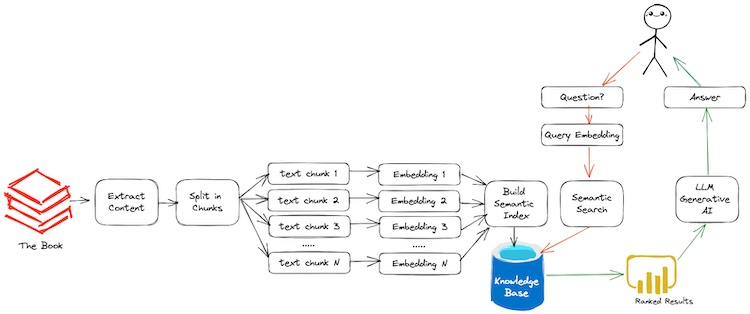

## ***Installing Necessary Libraries***

In [ ]:
!pip install langchain
!pip install openai
!pip install PyPDF2
!pip install faiss-cpu
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.5 MB/s eta 0:00:00


## ***Importing Necessary Libraries***

In [ ]:
from PyPDF2 import PdfReader
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import ElasticVectorSearch, Pinecone, Weaviate, FAISS

## ***Setting-Up OpenAI_API_Key*** - [Access_To_OpenAI_API_Key](https://platform.openai.com/account/billing/overview)

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "YOUR-OPENAI-API-KEY"

## **Setting the Location and Loading the pdf file**

In [ ]:
reader = PdfReader('/content/drive/MyDrive/Chat with PDF using LangChain + OpenAI/an-effective-query-system-using-llms-and-langchain-IJERTV12IS060161.pdf')

In [ ]:
reader

## ***Reading data from the pdf file and assigning them into a variable called raw_text***

In [ ]:
raw_text = ''
for i, page in enumerate(reader.pages):
    text = page.extract_text()
    if text:
        raw_text += text

In [ ]:
raw_text

'An Ef fective Query System Using LLMs and \nLangChain  \n \nAdith Sreeram A S  \nSchool of Computer Scie nce and Engineering  \nVIT-AP U niversity  \nAmaravati, Andhra Pradesh, India.  \n  Pappuri Jithe ndra Sai  \nSchool of Computer Scie nce and Engineering  \nVIT-AP U niversity  \nAmaravati, Andhra Pradesh, India.  \n  \n \n \nAbstract—Due to the unstructured nature of the PDF \ndocument format and the requirement for precise and pertinent \nsearch results, querying a PDF can take time and effort. \nLang Chain  overcomes these challenges by utilizing advanced \nnatural language processing algorith ms that analyze the content \nof the PDFs and extract essential information. To improve the \nsearch experience, it uses  effective indexing and retrieval \ntechniques, mov able filters, and a simple search interface.  \nLangChain also allows users to save queries, create bookmarks, \nand annotate important sections, enabling efficient retrieval of \nrelevant information from PDF documents

## ***Note : We need to split the text that we read into smaller chunks so that during information retreival we don't hit the token size limits.***

In [ ]:
text_splitter = CharacterTextSplitter(
    separator = "\n",
    chunk_size = 1000,
    chunk_overlap  = 200,
    length_function = len,
)
texts = text_splitter.split_text(raw_text)

In [ ]:
len(texts)

11

In [ ]:
texts[0]

'An Ef fective Query System Using LLMs and \nLangChain  \n \nAdith Sreeram A S  \nSchool of Computer Scie nce and Engineering  \nVIT-AP U niversity  \nAmaravati, Andhra Pradesh, India.  \n  Pappuri Jithe ndra Sai  \nSchool of Computer Scie nce and Engineering  \nVIT-AP U niversity  \nAmaravati, Andhra Pradesh, India.  \n  \n \n \nAbstract—Due to the unstructured nature of the PDF \ndocument format and the requirement for precise and pertinent \nsearch results, querying a PDF can take time and effort. \nLang Chain  overcomes these challenges by utilizing advanced \nnatural language processing algorith ms that analyze the content \nof the PDFs and extract essential information. To improve the \nsearch experience, it uses  effective indexing and retrieval \ntechniques, mov able filters, and a simple search interface.  \nLangChain also allows users to save queries, create bookmarks, \nand annotate important sections, enabling efficient retrieval of \nrelevant information from PDF documents

In [ ]:
texts[1]

'LangChain also allows users to save queries, create bookmarks, \nand annotate important sections, enabling efficient retrieval of \nrelevant information from PDF documents. The features of \nLangChain increase overal l efficiency and makes PDF querying \nmuch easier and  simpler .  \nKeywords —LangChain , Querying PD F, Streamlit.  \nI.  INTRODUCTION   \nThe growth and use of digital products is growing \nexponentially in this world. And the process of searching and \nretrieving information  from  those pdf documents is \nchallenging. Now, we have a t ool that revolutionized Natural \nLanguage Processing and is designed to create applications \nbased on Large Language Models [LLM].  \n \nLangChain is a cutting -edge solutio n which helps us in the \nquerying proce ss and extracting information from PDFs. With \nits advanced NLP algorithms,  it helps users to interact with the \nPDFs and makes the document search and retrieval very easy.  \n \nAfter building our LLM model we will use S

## ***Downloading the Embeddings from OpenAI***

In [ ]:
embeddings = OpenAIEmbeddings()

## ***Applying Embeddings to the texts retrieved from the pdf file***

In [ ]:
docsearch = FAISS.from_texts(texts, embeddings)

In [ ]:
docsearch

## ***Importing and Defining the QnA Chain from the LangChain***

In [ ]:
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI

In [ ]:
chain = load_qa_chain(OpenAI(), chain_type="stuff")

## ***Querying and Retrieving the Answers***

In [ ]:
query = "who are the authors of the article?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' Adith Sreeram A S and Pappuri Jitendra Sai.'

In [ ]:
query = "what is langchain?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' LangChain is a cutting-edge solution which helps users in the querying process and extracting information from PDFs. With its advanced NLP algorithms, it helps users to interact with the PDFs and makes the document search and retrieval very easy.'

In [ ]:
query = "how many references are there?"
docs = docsearch.similarity_search(query)
chain.run(input_documents=docs, question=query)

' Six references.'

## ***Deploying the Chat Model using Gradio***

In [ ]:
# Installing Gradio Library

!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 8.0 MB/s eta 0:

In [ ]:
# Importing Gradio Library

import gradio

In [ ]:
# Defining the Function for Retrieving the Answers from the Questions

def QnA_Prediction(input_):
  query = str(input_)
  docs = docsearch.similarity_search(query)
  return chain.run(input_documents=docs, question=query)

In [ ]:
QnA_Prediction('How many reference are there?')

' There are 6 references.'

In [ ]:
# Designing the Application Interface and Launching the Application

interface = gradio.Interface(fn=QnA_Prediction, inputs="text", outputs="text", title='Chat with PDF using LangChain + OpenAI')
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f98d2c7e1b702f6cf5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


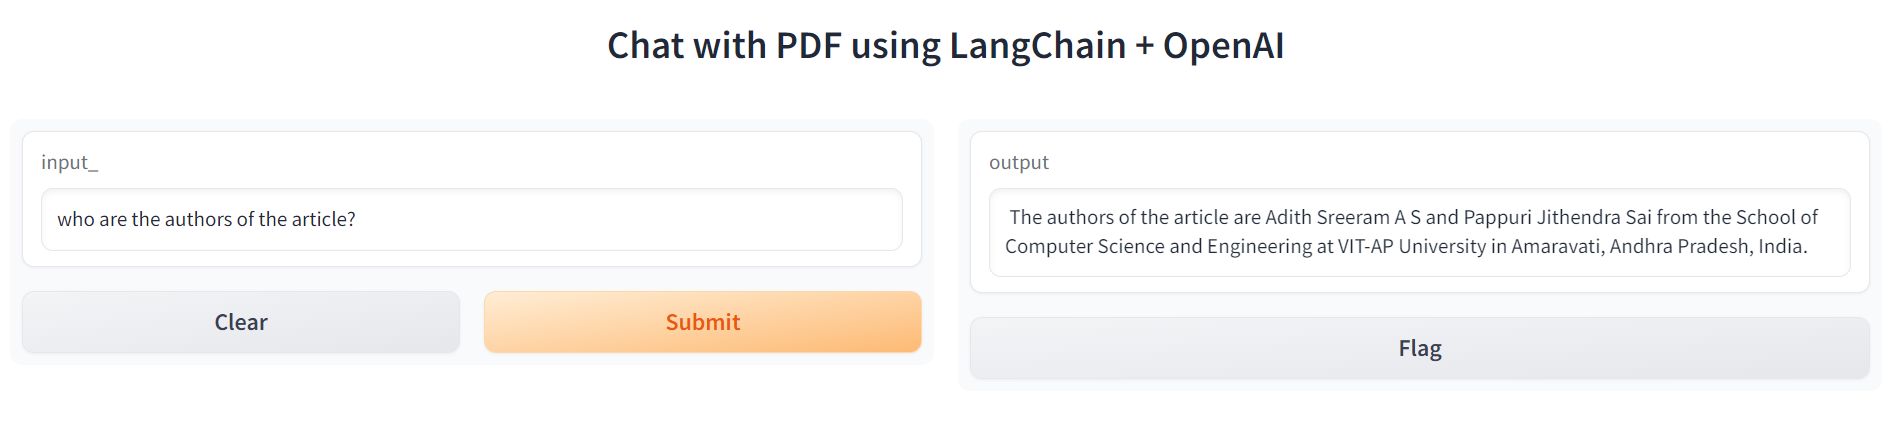